In [1]:
from airLibs import plotting as aplt
import numpy as np
from airLibs import runOpenFoam as of
from airLibs import runF2w as f2w
from xfoil import XFoil
from xfoil.model import Airfoil as XFAirfoil
from airLibs import airfoil as af

import os

In [2]:
AoAmax = 9
AoAmin = -6
NoAoA = (AoAmax - AoAmin) * 2 + 1
angles = np.linspace(AoAmin, AoAmax, NoAoA)
Reyn = 346153  # np.logspace(3,6,20)
MACH = 0.03

In [3]:
CASE = "Wing"
os.chdir(CASE)
casedir = os.getcwd()

In [4]:
for i in os.listdir():
    if i.startswith("naca"):
        airfile = i
airfoil = airfile[4:]

In [5]:
n_points = 100
pts = af.saveAirfoil(["s", airfile, airfoil, 0, n_points])

In [6]:
clcdcmFW = f2w.makeCLCD(Reyn, MACH, angles)
xf = XFoil()
xf.Re = Reyn
xf.max_iter = 400
xf.print = False
xpts, ypts = pts.T
naca0008 = XFAirfoil(x=xpts, y=ypts)
xf.airfoil = naca0008
aXF, clXF, cdXF, cmXF, cpXF = xf.aseq(AoAmin, AoAmax, 0.5)
clcdcmXF = np.array([aXF, clXF, cdXF, cmXF]).T
clcdcmOF = of.makeCLCD(angles)

OK


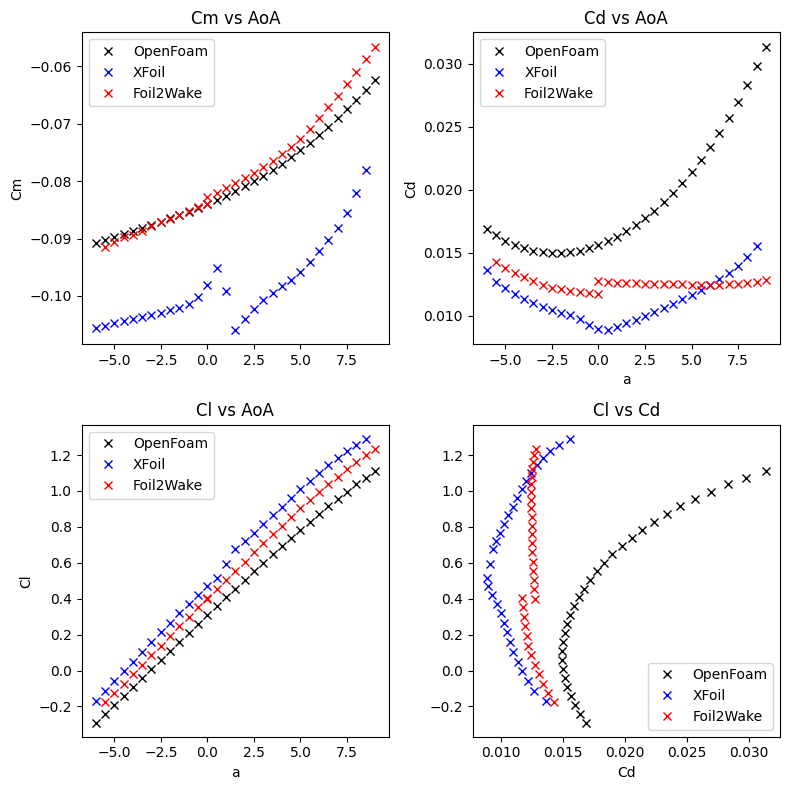

In [7]:
f2w = [clcdcmFW, "rx", "Foil2Wake"]
openF = [clcdcmOF, "kx", "OpenFoam"]
Xfoil = [clcdcmXF, "bx", "XFoil"]
aplt.plotAeorCoeffs([openF,Xfoil, f2w])
